In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
font = {'family' : 'Foundry',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('text', usetex=True)

### Olinger et al.

In [2]:
C = 2.74 #mm/us
S = 2.6
rho0 = 1.9 #g cm^-3
V0 = 1./rho0

In [3]:
Vrel = np.linspace(1,0.5,100)

In [4]:
VH = Vrel*V0
PH = (C**2.)*(V0-VH)/((V0-S*(V0-VH))**2.)
EH = (0.5)*C**2.*(V0-VH)**2./((V0-S*(V0-VH))**2.)

Text(0, 0.5, '$P$  /GPa')

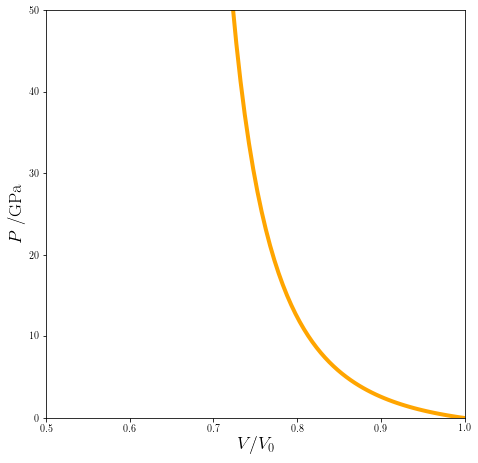

In [5]:
fig= plt.figure(figsize=(7.5,7.5))
plt.plot(Vrel,PH,linewidth=4.0,color="orange")
plt.xlim((0.5,1.))
plt.ylim((0.,50.))
plt.xlabel("$V/V_0$",fontsize=18)
plt.ylabel("$P$  /GPa",fontsize=18)

### Yoo and Cynn

In [6]:
#below 27 GPa
K_T0 = 12.4
dK_T0 = 10.4

P_BM = (3./2.)*K_T0*(Vrel**(-7./3.)-Vrel**(-5./3.))*(1.+(3./4.)*(dK_T0-4.)*(Vrel**(-2./3.)-1.))

Text(0, 0.5, '$P$  /GPa')

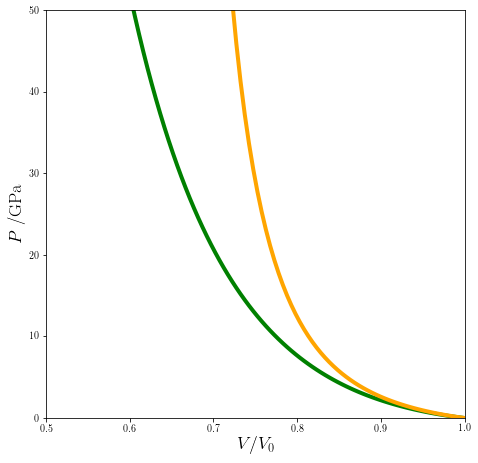

In [7]:
fig= plt.figure(figsize=(7.5,7.5))
plt.plot(Vrel,P_BM,linewidth=4.0,color="green")
plt.plot(Vrel,PH,linewidth=4.0,color="orange")
plt.xlim((0.5,1.))
plt.ylim((0.,50.))
plt.xlabel("$V/V_0$",fontsize=18)
plt.ylabel("$P$  /GPa",fontsize=18)

### EOS surface from M-G

In [8]:
def mgP(gamma,V0,PH,EH,E):
    return (gamma/V0)*(E-EH)+PH

In [9]:
Gamma = 1.1
E0 = 0
E_BM = E0 + (9./16.)*V0*K_T0*((Vrel**(-2./3.)-1)**3.*dK_T0+(Vrel**(-2./3.)-1)**2.*(6.-4.*Vrel**(-2./3.)))

In [10]:
E_EOS = np.linspace(0.,8.,100)
P_EOS = np.zeros([E_EOS.shape[0],Vrel.shape[0]])

for i in np.arange(Vrel.shape[0]):
    for j in np.arange(E_EOS.shape[0]):
        P_EOS[j,i] = mgP(Gamma,V0,P_BM[i],E_BM[i],E_EOS[j])

Text(0.5, 0, '$V/V_0$')

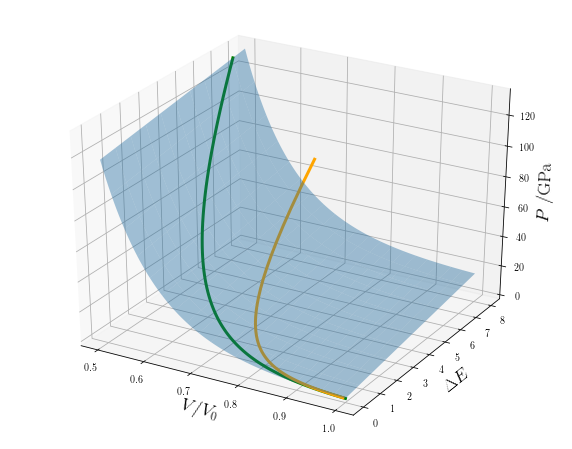

In [11]:
fig= plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(Vrel,E_EOS, sparse=False)
ax.plot_surface(X, Y, P_EOS,alpha=0.4,linewidth=0,rstride=10,cstride=5)
ax.plot(Vrel,E_BM,P_BM,linewidth=3,color="green")
ax.plot(Vrel[1:60],EH[1:60],PH[1:60],linewidth=3,color="orange")

ax.set_ylabel("$\Delta E$",fontsize=18)
ax.set_zlabel("$P$   /GPa",fontsize=18)
ax.set_xlabel("$V/V_0$",fontsize=18)
#ax.set_xlim3d([np.min(X/V0),np.max(X/V0)])